#### Carga de datos:

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# For naive bayes
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
df_raw = pd.read_csv('anime_movies.csv', encoding = "ISO-8859-1")

# As the data has no column titles, we will add our own


# Show the first 10 rows of the dataframe.
df_raw.head()

,title,genres,description,poster,link
0,Free! Movie 5: The Final Stroke - Kouhen,"['School', 'Sports']",After his first appearance on the competitive ...,https://img.flawlessfiles.com/_r/300x400/100/2...,https://aniwatch.to/free-movie-5-the-final-str...
1,Resident Evil: Death Island,"['Action', 'Game', 'Horror', 'Sci-Fi']",D.S.O. agent Leon S. Kennedy is on a mission t...,https://img.flawlessfiles.com/_r/300x400/100/a...,https://aniwatch.to/resident-evil-death-island...
2,Detective Conan Movie: The Story of Haibara Ai...,"['Adventure', 'Police']",The movie will focus on Ai Haibara's past and ...,https://img.flawlessfiles.com/_r/300x400/100/c...,https://aniwatch.to/detective-conan-movie-the-...
3,Tsurune Movie: Hajimari no Issha,"['School', 'Sports']",Movie adaptation of Tsurune: Kazemai Koukou Ky...,https://img.flawlessfiles.com/_r/300x400/100/f...,https://aniwatch.to/tsurune-movie-hajimari-no-...
4,Backflip!! The Movie,"['Comedy', 'Drama', 'Sports']",Ever since coming across the world of boyâs ...,https://img.flawlessfiles.com/_r/300x400/100/1...,https://aniwatch.to/backflip-the-movie-18405


In [3]:
df = df_raw[['description']]
df.head()


,description
0,After his first appearance on the competitive ...
1,D.S.O. agent Leon S. Kennedy is on a mission t...
2,The movie will focus on Ai Haibara's past and ...
3,Movie adaptation of Tsurune: Kazemai Koukou Ky...
4,Ever since coming across the world of boyâs ...


#### Convirtiendolo en una lista:

In [4]:
description_list = df['description'].tolist()
print(description_list)

["After his first appearance on the competitive world stage, Haruka is held captive by the swimming of the unmistakable champion, Albert, and feels like he's lost his way. With the current state of things, his swimming and what the water means to him are called into question. Haruka begins to sink to the bottom of the murky water as he struggles on his own.  Pushed on by a restless urge in his heart, Haruka purposefully puts himself through a rigorous and intensive training regiment, relentlessly devoting himself to practice. In his heart, Haruka knows that he's pushing himself beyond his limits both physically and mentally. His friends can do nothing but watch over and have faith in him.  Memories of Albert's cold, dry swimming keep replaying in his mind. I have to get faster, I have to become stronger. I have to compete against Albert again.  Haruka unleashes his stroke to cut through the heavy, indifferent water. His friends draw closer to watch.  What scenery will Haruka see at the

## Topic modeling

In [5]:


import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import gensim 
from nltk.stem import WordNetLemmatizer
import logging
from gensim.models import CoherenceModel
import pyLDAvis.gensim

# Text preprocessing
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords, punctuation, and non-alphabetic tokens
    stop_words = set(stopwords.words("english") + list(string.punctuation))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Preprocess each scam description
processed_descriptions = [preprocess_text(description) for description in description_list]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_descriptions)
corpus = [dictionary.doc2bow(tokens) for tokens in processed_descriptions]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)




In [6]:
# Print topics and associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.005*"source" + 0.005*"world" + 0.005*"mal" + 0.004*"rewrite" + 0.004*"written"')
(1, '0.006*"world" + 0.004*"source" + 0.004*"one" + 0.004*"new" + 0.004*"mal"')
(2, '0.005*"world" + 0.005*"source" + 0.004*"written" + 0.004*"mal" + 0.004*"rewrite"')
(3, '0.007*"world" + 0.005*"one" + 0.005*"source" + 0.005*"life" + 0.004*"however"')
(4, '0.006*"new" + 0.006*"movie" + 0.005*"source" + 0.004*"world" + 0.004*"one"')


In [7]:

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#this line is setting up a logger that formats log messages with the timestamp, level, and message, and handles all messages with level INFO and above.

# Text preprocessing
def preprocess_text(text, stop_words):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords, punctuation, and non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Preprocess each scam description
stop_words = set(stopwords.words("english") + list(string.punctuation))
processed_descriptions = [preprocess_text(description, stop_words) for description in description_list]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_descriptions)
corpus = [dictionary.doc2bow(tokens) for tokens in processed_descriptions]

# Build the LDA model
def build_lda_model(corpus, dictionary, num_topics=3, passes=10):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)
    return lda_model

lda_model = build_lda_model(corpus, dictionary, num_topics=5, passes=10)



2024-02-19 23:05:46,593 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-02-19 23:05:46,676 : INFO : built Dictionary<9611 unique tokens: ['albert', 'appearance', 'become', 'begin', 'beyond']...> from 836 documents (total 47545 corpus positions)
2024-02-19 23:05:46,676 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<9611 unique tokens: ['albert', 'appearance', 'become', 'begin', 'beyond']...> from 836 documents (total 47545 corpus positions)", 'datetime': '2024-02-19T23:05:46.676198', 'gensim': '4.3.2', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}
2024-02-19 23:05:46,745 : INFO : using symmetric alpha at 0.2
2024-02-19 23:05:46,745 : INFO : using symmetric eta at 0.2
2024-02-19 23:05:46,749 : INFO : using serial LDA version on this node
2024-02-19 23:05:46,752 : INFO : running online (multi-pass) LDA training, 5 topics, 10 passes 

In [8]:
# Print topics and associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

2024-02-19 23:05:58,156 : INFO : topic #0 (0.200): 0.005*"ha" + 0.005*"new" + 0.005*"find" + 0.005*"mal" + 0.005*"written"
2024-02-19 23:05:58,158 : INFO : topic #1 (0.200): 0.006*"source" + 0.005*"world" + 0.004*"one" + 0.004*"ha" + 0.004*"city"
2024-02-19 23:05:58,162 : INFO : topic #2 (0.200): 0.007*"world" + 0.007*"ha" + 0.005*"one" + 0.005*"friend" + 0.005*"source"
2024-02-19 23:05:58,164 : INFO : topic #3 (0.200): 0.008*"ha" + 0.005*"earth" + 0.005*"wa" + 0.004*"world" + 0.004*"source"
2024-02-19 23:05:58,164 : INFO : topic #4 (0.200): 0.009*"world" + 0.009*"ha" + 0.005*"one" + 0.005*"source" + 0.004*"life"


(0, '0.005*"ha" + 0.005*"new" + 0.005*"find" + 0.005*"mal" + 0.005*"written"')
(1, '0.006*"source" + 0.005*"world" + 0.004*"one" + 0.004*"ha" + 0.004*"city"')
(2, '0.007*"world" + 0.007*"ha" + 0.005*"one" + 0.005*"friend" + 0.005*"source"')
(3, '0.008*"ha" + 0.005*"earth" + 0.005*"wa" + 0.004*"world" + 0.004*"source"')
(4, '0.009*"world" + 0.009*"ha" + 0.005*"one" + 0.005*"source" + 0.004*"life"')


The output you've provided shows the top 5 words associated with each of the 5 topics generated by your LDA model. Each line represents a topic, and the numbers before the words are the weights indicating how important a word is for that topic.

Here's a brief interpretation of the topics:

Topic 0: This topic seems to be about something new being found or written. The word "mal" could be from a different language or a specific term in the context of your data.
Topic 1: This topic might be about a source in the world or a city. The word "one" could be part of a larger context not visible in the top words.
Topic 2: This topic seems to involve friends in the world or a source. Again, the word "one" could be part of a larger context.
Topic 3: This topic might be about something happening on Earth or in the world, possibly related to a source.
Topic 4: This topic seems to be about life in the world or a source. The word "one" could be part of a larger context.
Remember, these are just rough interpretations based on the top words. The actual meaning of the topics would depend on the context of your data. Also, the words "ha" and "wa" are likely stemmed versions of "has" and "was", which don't provide much information about the topics. You might want to add them to your list of stopwords.

If the topics are not clear or distinct, you might want to experiment with different parameters for the LDA model (like the number of topics), preprocess your data differently (like using different stopwords or adding bigrams), or even try a different topic modeling algorithm.

### Visualizando los topicos 

In [9]:


# Prepare the visualization
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)


In [10]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_descriptions, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2024-02-19 23:06:09,403 : INFO : -8.499 per-word bound, 361.7 perplexity estimate based on a held-out corpus of 836 documents with 47545 words
2024-02-19 23:06:09,407 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows



Perplexity:  -8.498701023543992


2024-02-19 23:06:21,290 : INFO : 7 accumulators retrieved from output queue
2024-02-19 23:06:21,312 : INFO : accumulated word occurrence stats for 1749 virtual documents



Coherence Score:  0.3548578258990265


Perplexity: This is a statistical measure of how well a probability model predicts a sample. In the context of LDA, a lower perplexity score indicates that the model is better at predicting the sample. You can compute the perplexity of an LDA model in Gensim using the log_perplexity method.

Coherence Score: This is a measure of the quality of the topics generated by the model. A higher coherence score indicates that the words in each topic are more semantically similar, and thus the topics are of higher quality. You can compute the coherence score of an LDA model in Gensim using the CoherenceModel class.

## Text mining


Carga de datos:

In [11]:
import pandas as pd
import numpy as np
import re
import pickle
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# For naive bayes
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [12]:
# Reading the dataset with no columns titles and with latin encoding 
df_raw = pd.read_csv('anime_movies.csv', encoding = "ISO-8859-1")

# As the data has no column titles, we will add our own


# Show the first 10 rows of the dataframe.
df_raw.head()

,title,genres,description,poster,link
0,Free! Movie 5: The Final Stroke - Kouhen,"['School', 'Sports']",After his first appearance on the competitive ...,https://img.flawlessfiles.com/_r/300x400/100/2...,https://aniwatch.to/free-movie-5-the-final-str...
1,Resident Evil: Death Island,"['Action', 'Game', 'Horror', 'Sci-Fi']",D.S.O. agent Leon S. Kennedy is on a mission t...,https://img.flawlessfiles.com/_r/300x400/100/a...,https://aniwatch.to/resident-evil-death-island...
2,Detective Conan Movie: The Story of Haibara Ai...,"['Adventure', 'Police']",The movie will focus on Ai Haibara's past and ...,https://img.flawlessfiles.com/_r/300x400/100/c...,https://aniwatch.to/detective-conan-movie-the-...
3,Tsurune Movie: Hajimari no Issha,"['School', 'Sports']",Movie adaptation of Tsurune: Kazemai Koukou Ky...,https://img.flawlessfiles.com/_r/300x400/100/f...,https://aniwatch.to/tsurune-movie-hajimari-no-...
4,Backflip!! The Movie,"['Comedy', 'Drama', 'Sports']",Ever since coming across the world of boyâs ...,https://img.flawlessfiles.com/_r/300x400/100/1...,https://aniwatch.to/backflip-the-movie-18405


Quitando las columnas que no nos interesan:

In [13]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
df = df_raw[['description']]

# Replacing the label 4 with 1.


df.head(10)

,description
0,After his first appearance on the competitive ...
1,D.S.O. agent Leon S. Kennedy is on a mission t...
2,The movie will focus on Ai Haibara's past and ...
3,Movie adaptation of Tsurune: Kazemai Koukou Ky...
4,Ever since coming across the world of boyâs ...
5,"After a covert mission goes wrong, Mobile Suit..."
6,Two people separated by time and space must un...
7,"After their first kiss, Kaguya Shinomiya and M..."
8,Kaoru Tono heard a rumor: The laws of space an...
9,The Children's Lunch Is Taking Place At A Them...


## Data cleaning 

In [14]:
import nltk
from nltk.corpus import stopwords

# Download stopwords solo una vez(son las de ingles)
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_apply(des):
    des = des.lower()  # Convert to lowercase
    # Remove punctuation
    des = ''.join([char for char in des if char.isalnum() or char.isspace()])
    # Remove stopwords
    des = ' '.join([word for word in des.split() if word not in stop_words])
    return des


# Apply the preprocessing function to the 'description' column
df['processed_description'] = df.description.apply(preprocess_apply)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\oscar\AppData\Local\Temp\ipykernel_12576\801474680.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_description'] = df.description.apply(preprocess_apply)


In [15]:
print(df.processed_description[0])

first appearance competitive world stage haruka held captive swimming unmistakable champion albert feels like hes lost way current state things swimming water means called question haruka begins sink bottom murky water struggles pushed restless urge heart haruka purposefully puts rigorous intensive training regiment relentlessly devoting practice heart haruka knows hes pushing beyond limits physically mentally friends nothing watch faith memories alberts cold dry swimming keep replaying mind get faster become stronger compete albert haruka unleashes stroke cut heavy indifferent water friends draw closer watch scenery haruka see end struggleï¼ââ


In [16]:
df.head()

,description,processed_description
0,After his first appearance on the competitive ...,first appearance competitive world stage haruk...
1,D.S.O. agent Leon S. Kennedy is on a mission t...,dso agent leon kennedy mission rescue dr anton...
2,The movie will focus on Ai Haibara's past and ...,movie focus ai haibaras past reconstruct myste...
3,Movie adaptation of Tsurune: Kazemai Koukou Ky...,movie adaptation tsurune kazemai koukou kyuudoubu
4,Ever since coming across the world of boyâs ...,ever since coming across world boyâs rhythmic ...


Could word code:

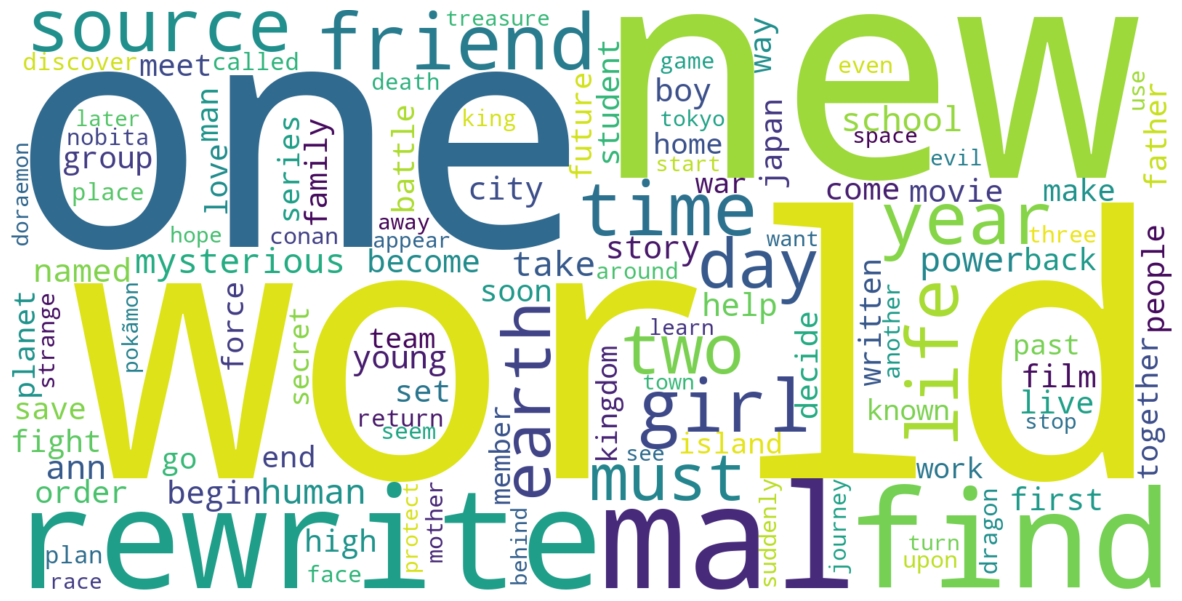

In [17]:
processedtext = list(df['processed_description'])
plt.figure(figsize = (15,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,  background_color ='white', min_font_size = 25,
               collocations=False).generate(" ".join(processedtext))      
plt.axis("off") 

plt.imshow(wc , interpolation = 'bilinear')